In [51]:
import os
import numpy as np
#from PIL import image
import matplotlib.image as mpimg
from matplotlib.pyplot import  imread 
import matplotlib.pyplot as plt
import random
from numpy import asarray
from PIL import Image
from numpy import linalg as La

In [52]:
def Extract_data(Path):
    Data_Path=Path
    files=os.listdir(Data_Path)
    print(len(files))
    N=len(files)
    X=[]
    Labels=[]
    for i in files:
        print(Data_Path + i)
        arr=imread(Data_Path + i)
        arr=np.array(arr)
        #arr=np.array(arr)
        arr=arr.flatten()
        X.append(arr)
        if 'sad' in i:
            l=0   
        else: l=1
        Labels.append(l)
        
    X=np.array(X)
    print(type(X))
    print(X.shape)
    print(Labels)
    return X,Labels,X.shape
    
    

In [53]:
def Plot_randomly(Path):
    Data_Path=Path
    files=os.listdir(Data_Path)
    fig = plt.figure(figsize=(10, 10))
    rows = 1
    columns = 4
    x=random.choices(files ,k=4)

    for i in range(len(x)):
        fig.add_subplot(rows, columns, i+1)
        path=Data_Path + x[i]
        plt.subplot(rows,columns,i+1)    
        im = mpimg.imread(path)
        plt.imshow(im , cmap='gray')  


In [54]:
def Data_center(X):
    nu=np.mean(X,axis=0)
    #print(nu.shape)
    X=X-nu
    #print(X)
    return X


In [55]:
def Eigen_vec_decomposing(X, k): #PCA
    X_C=Data_center(X)
    (N,D)=X.shape
    
    #Calculating 1/N * X * X^t
    Cov=1/N*(np.matmul(X_C, X_C.T) )
    print(Cov.shape)
    
    #Eigen Value and Eigen vector analysis
    values , vectors =np.linalg.eig(Cov)
    values=np.absolute(values)
    Indices=np.argsort(values)
    Indices=Indices[::-1]
    
    #Finding only required eigen vectors
    values=values[Indices]
    vectors=vectors[:,Indices] #Sorting vectors
    values=values[:k]
    vectors=vectors[:,:k] #finding only k best vectors
    
    #Making Vectors norm 1 by dividing it with sqrt(N*Lamdai)
    vectors_new=X_C.T @ vectors
    values=np.sqrt(values * N) 
    #print(values.shape)
    vectors_new=vectors_new/values
    print(vectors_new.shape)
    return vectors_new

In [56]:
def Eigen_analysis(X,K):
    #K=20
    vectors=Eigen_vec_decomposing(X,K)
    print(vectors.shape)
    fig = plt.figure(figsize=(20,20))
    rows = 4
    columns = 6
    for i in range(K):
        plot=fig.add_subplot(rows, columns, i+1)
        plot.set_title('Eigen face '+str(i+1))
        plt.imshow(vectors[:,i].reshape((101,101)) , cmap='gray')
    return vectors
    

In [57]:
def Transform(X , vectors , k):
    #printing shape of data
    X=Data_center(X) #N X D
    print(vectors.shape) # D X N
    #k=16
    vectors=vectors[:,:k] #taking 1st k vectors
    print(vectors.shape)
    X_Trans= X @ vectors
    print(X_Trans.shape) # N X K ,N vectors ecah of dimension K
    #print(X_Trans)
    return X_Trans
    

In [58]:
def LDA(X_Trans):
    X=X_Trans             # 20 X 16
    y=np.array(Labels)    # 20 X 1
    print(X.shape , y.shape)
    I_0=(y==0)
    I_1=(y==1)
    M_0=np.mean(X[I_0] , axis =0)
    M_1=np.mean(X[I_1] , axis =0)
    #print(y) 20 X 1
    #print(I_0) 11 X 1
    #print(I_1)  9 X 1
    S_b=np.outer ( (M_0 - M_1) , (M_0 - M_1) ) # 16 X 16 shape

    #Finding S_t

    X_C=Data_center(X_Trans)
    #Calculating 1/N * X * X^t
    Cov=1/N*(np.matmul(X_C.T, X_C) )
    print(S_b.shape)
    print(Cov.shape) # 16 X 16

    #calculating S_w

    S_w=Cov - S_b
    Matrix=np.linalg.inv(S_w) @ S_b
    #Eigen Value and Eigen vector analysis
    values , vectors =np.linalg.eig(Matrix)
    values=np.absolute(values)
    Indices=np.argsort(values)
    Indices=Indices[::-1]

    #Finding only required eigen vectors
    values=values[Indices]
    vectors=vectors[:,Indices] #Sorting vectors
    print(vectors[:,0].shape)
    u=vectors[:,0]
    M=u @ u
    u=u/M
    #print(vectors)

    X_lda = X_C @ u
    print(X_lda.shape)
    return X_lda , I_0 , I_1 , u

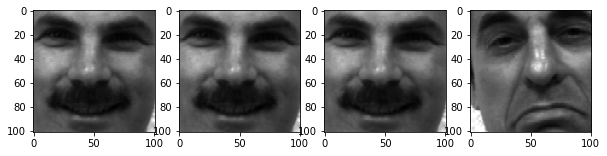

In [59]:
Train_Path='/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/train/'
Plot_randomly(Train_Path)


In [60]:
X , Labels ,(N,D) = Extract_data(Train_Path)
Original_Data=X

20
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/train/subject09.sad.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/train/subject10.sad.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/train/subject09.happy.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/train/subject06.happy.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/train/subject13.happy.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/train/subject06.sad.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/train/subject03.sad.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/train/subject10.happy.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/train/subject04.sad.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/train/subject04.happy.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/train/subj

# Doing eigen analysis

(20, 20)
(10201, 20)
(10201, 20)


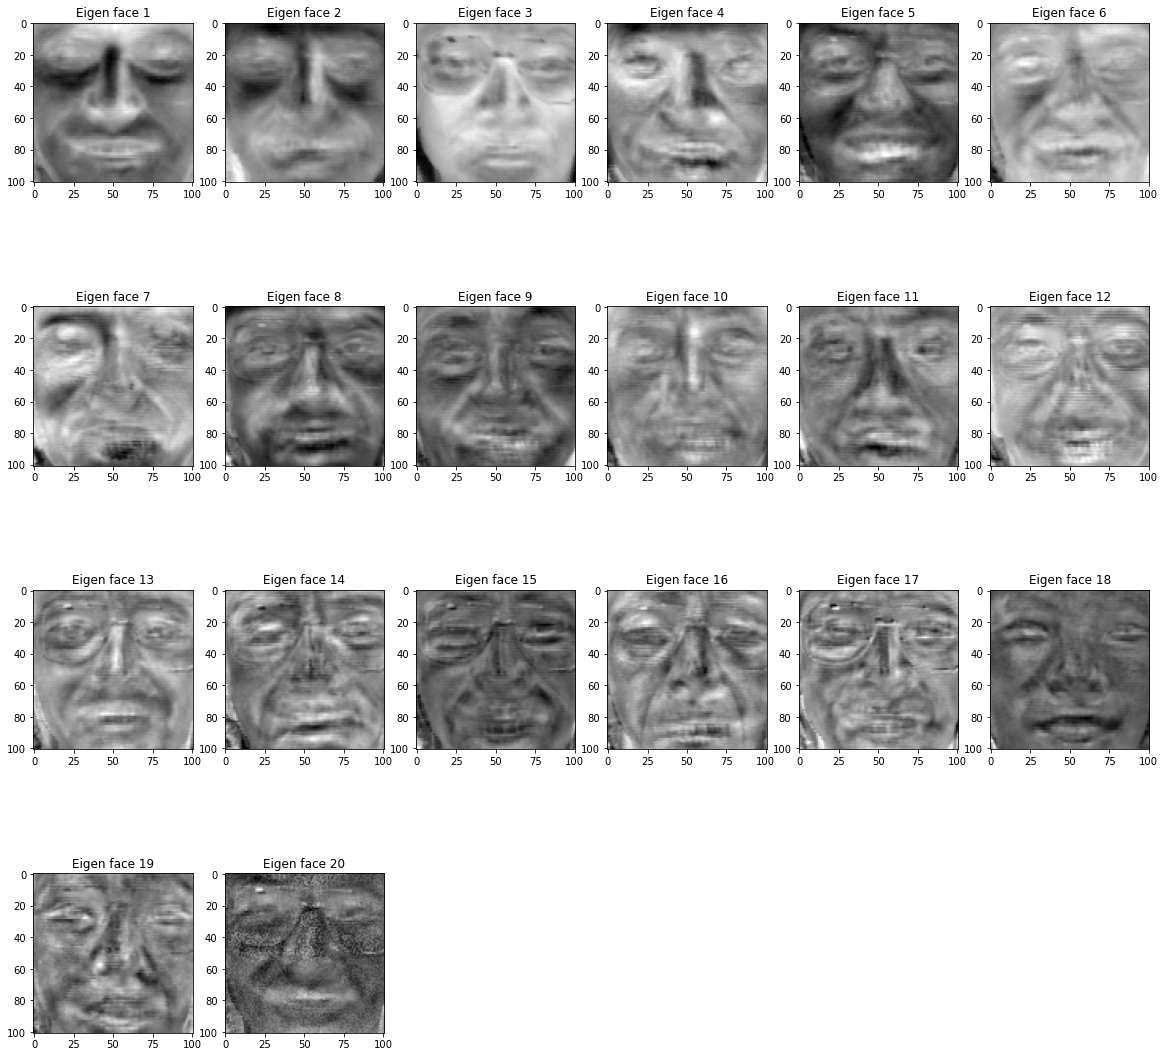

In [61]:
vectors = Eigen_analysis(X,20)

# Transforming data into eigen vector space

In [62]:
k=18
X_Trans=Transform(X , vectors , k)
print(X_Trans.shape)

(10201, 20)
(10201, 18)
(20, 18)
(20, 18)


# Plotting original Vs Transformed Data

(1, 10201)


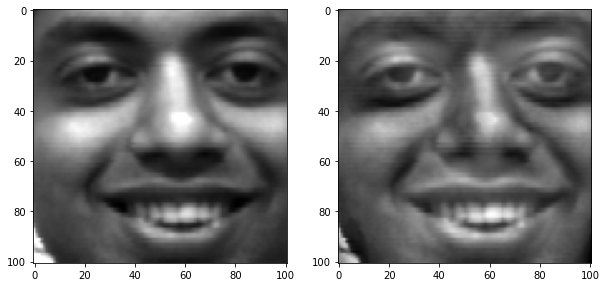

In [63]:
#Reconstructing
r_i=7#np.random.randint(20)
#Reconstructing Image back from eigen space
Rec_Image=np.zeros((1,D))
for i in range(k):
    Rec_Image+=X_Trans[r_i,i] * vectors[:,i]
print(Rec_Image.shape)

#Plotting Both Original and reconstructed Image

fig=plt.figure(figsize=(10,10))
plot=fig.add_subplot(1,2,1)
plot.imshow(Original_Data[r_i,:].reshape((101,101)) , cmap ='gray')
plot=fig.add_subplot(1,2,2)
plt.imshow(Rec_Image.reshape((101,101)) , cmap ='gray')


# Performing LDA

In [64]:
#X_lda , I_0 ,I_1 =LDA(X)
X_lda , I_0 ,I_1 , U_Lda =LDA(X_Trans)
#print(X_lda)
print(U_Lda.shape)

(20, 18) (20,)
(18, 18)
(18, 18)
(18,)
(20,)
(18,)


# Plotting After Applying LDA

/home/spirelab/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


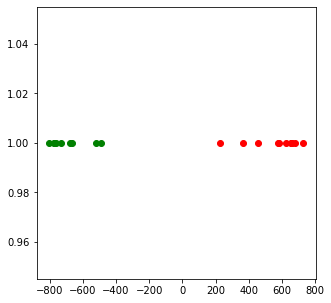

In [65]:
#Plotting 1-D lda data
fig=plt.figure(figsize=(5,5))
plt.scatter(X_lda[I_0], np.ones_like(X_lda[I_0]), c='r')
plt.scatter(X_lda[I_1], np.ones_like(X_lda[I_1]) , c='g')
#plt.grid()
plt.show()

In [16]:
#At K=12 we are getting linearly seperable  and we can classify it as happy and sad 

# Testing

In [88]:
Test_path='/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/test/'
#print(os.listdir(Test_path))
X , y_test ,(N,D) = Extract_data(Test_path)


10
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/test/subject15.sad.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/test/subject15.happy.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/test/subject11.happy.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/test/subject05.happy.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/test/subject14.sad.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/test/subject03.happy.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/test/subject14.happy.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/test/subject08.sad.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/test/subject01.sad.gif
/home/spirelab/Bhagya/Mlsp_assignments/ASSIGNMENT01/Question4/Data/test/subject08.happy.gif
<class 'numpy.ndarray'>
(10, 10201)
[0, 1, 1, 1, 0, 1, 1, 0, 0, 1]


In [89]:
X_Trans=Transform(X , vectors , k)
print(X_Trans.shape)
X_Lda=X_Trans @ U_Lda
print(X_Lda.shape)

(10201, 20)
(10201, 18)
(10, 18)
(10, 18)
(10,)


In [99]:
Data=X_Lda
D=np.empty(len(Data))
Loss=0
for i in range(len(Data)):
    if Data[i] < 0:
        D[i]=1
    else:
        D[i]=0        
    Loss+=(y_test[i] - D[i])**2
Loss=Loss/len(Data)
print("The Accuracy is  " , 1- Loss)

The Accuracy is   0.9


[False  True  True  True False  True  True False False  True]


/home/spirelab/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


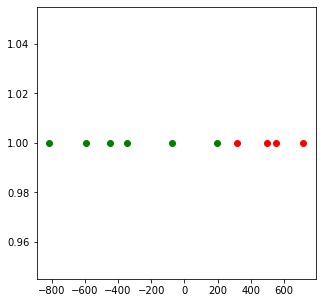

In [100]:
y_test=np.array(y_test)
I_0=(y_test == 0)
I_1=(y_test == 1)
print(I_1)
fig=plt.figure(figsize=(5,5))
plt.scatter(X_Lda[I_0], np.ones_like(X_Lda[I_0]), c='r')
plt.scatter(X_Lda[I_1], np.ones_like(X_Lda[I_1]) , c='g')
#plt.grid()
plt.show()